# Loading data using Pandas

In [13]:
#importing pandas library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
#loading data
titanic = pd.read_csv('train.csv')

# Seaborn

#### It is a python library used to statistically visualize data. Seaborn, built over Matplotlib, provides a better interface and ease of usage. It can be installed using the following command,

In [ ]:
!pip3 install seaborn

# Priniting data head

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the NULL values

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Graphical Analysis

### Number of survived and not survived passengers.

In [16]:
survived_count = titanic.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

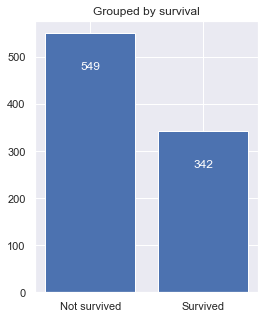

In [17]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

### Sex vs Survived

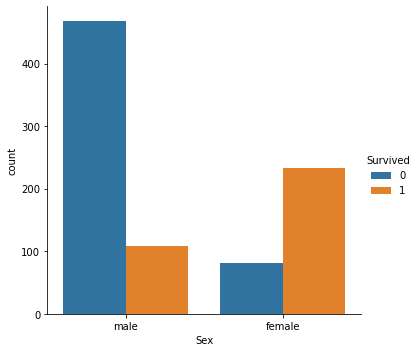

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# Countplot
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = titanic)

### Ticket class, gender and embarkation distribution

In [19]:
pclass_count = titanic.groupby('Pclass')['Pclass'].count()

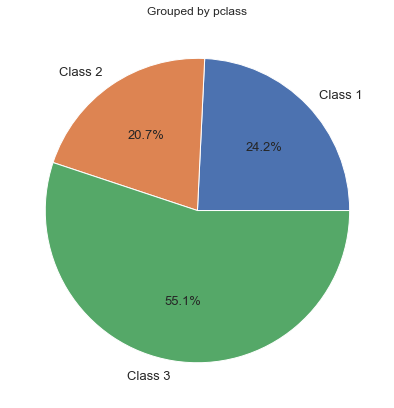

In [24]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

### Age distribution

In [25]:
ages = titanic[titanic['Age'].notnull()]['Age'].values

In [26]:
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1], dtype=int64),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [27]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

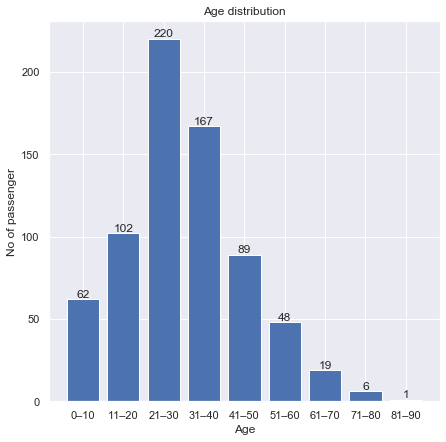

In [28]:
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

### Cabin distribution

In [30]:
def take_initial(x):
    return x[0]

In [31]:
cabins = titanic['Cabin'].dropna()
cabins = cabins.apply(take_initial)

cabins_count = cabins.value_counts()
cabins_count

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

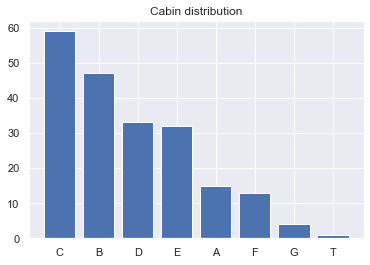

In [32]:
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

### Fare distribution

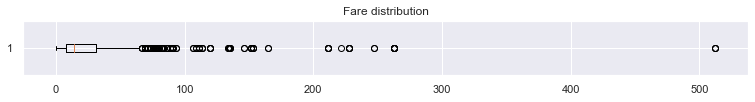

In [35]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(titanic['Fare'], vert=False)
plt.show()

### Pclass (Ordinal Feature) vs Survived

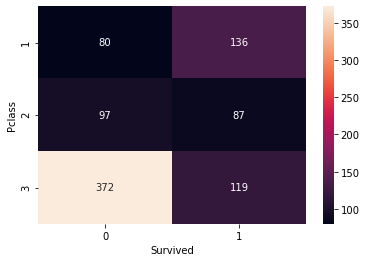

In [7]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

### Age (Continuous Feature) vs Survived

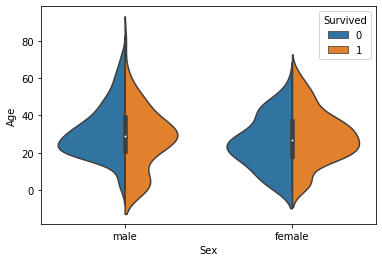

In [8]:
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = titanic, split = True)

### Factor plot for Family_Size (Count Feature) and Family Size

C:\Users\abhig\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhig\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


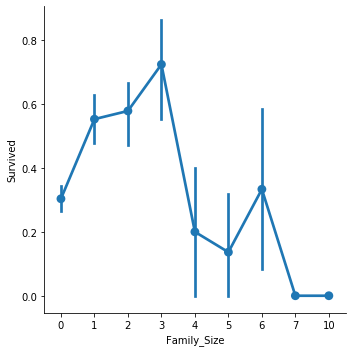

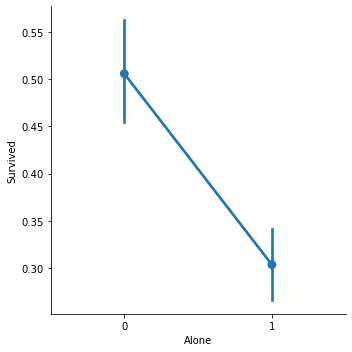

In [9]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']
  
# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)
  
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)

### Bar Plot for Fare (Continuous Feature)

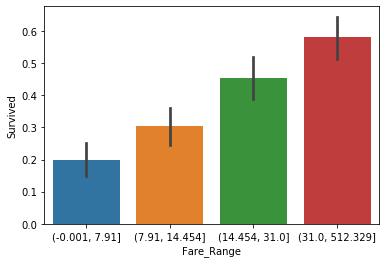

In [10]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)
  
# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', 
data = titanic)

### Categorical Count Plots for Embarked Feature

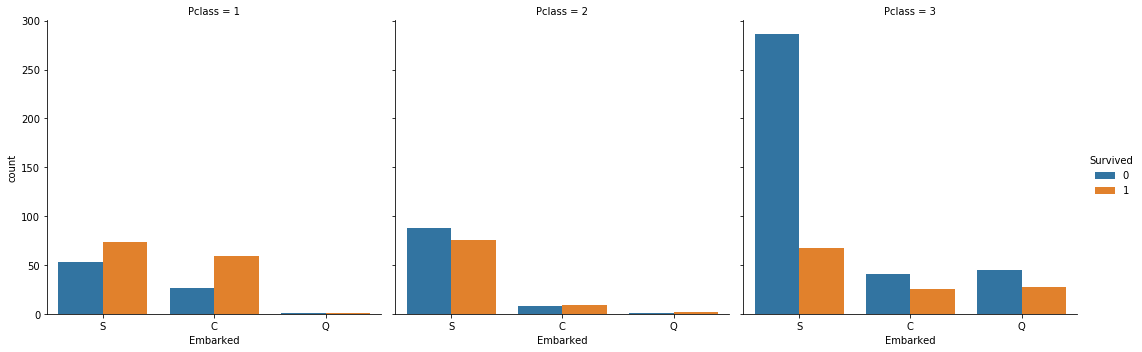

In [11]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = titanic)